In [1]:
# Copyright 2020-2022 Jordi Corbilla. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import os
import secrets
import pandas as pd
import argparse
from datetime import datetime

from stock_prediction_class import StockPrediction
from stock_prediction_lstm import LongShortTermMemory
from stock_prediction_numpy import StockData
from stock_prediction_plotter import Plotter
from stock_prediction_readme_generator import ReadmeGenerator
from stock_prediction_deep_learning import train_LSTM_network

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Ticker: ^FTSE
Start Date: 2017-11-01
Validation Date: 2017-11-01
Test Run Folder: ^FTSE_20230423_ffb2d8ad0d75f143acb92f03e4b1bd0d
End Date: 2023-04-23
[*********************100%***********************]  1 of 1 completed
mean: [0.68902354]
max 0.9999999999999998
min 0.0
Std dev: [0.20211829]
plotting Data and Histogram


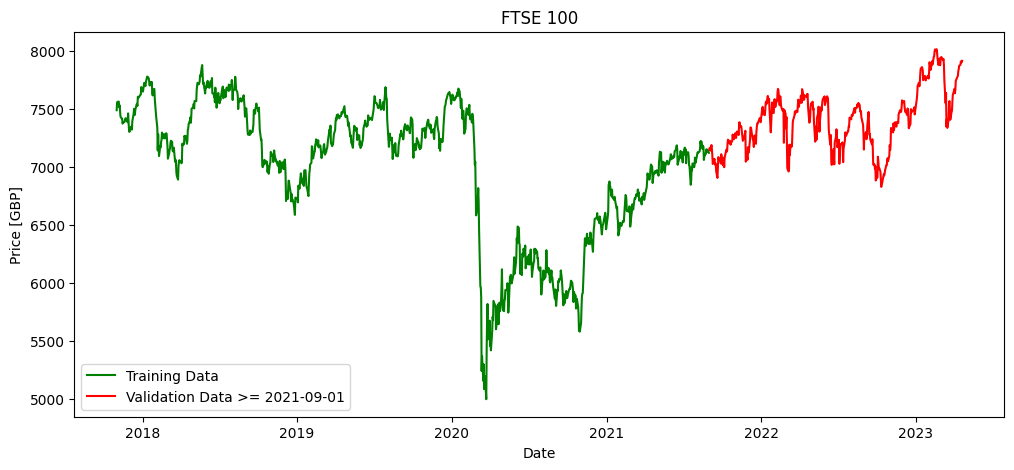

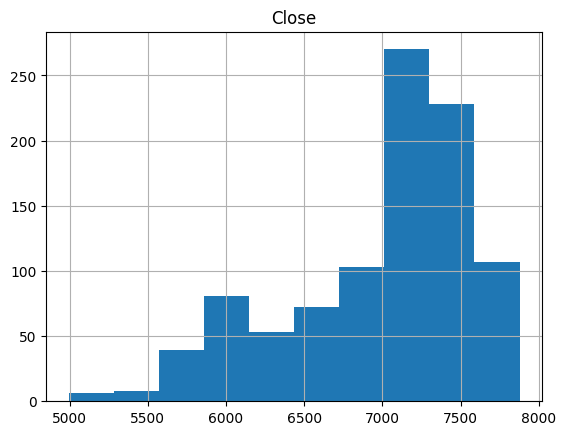

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 3, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

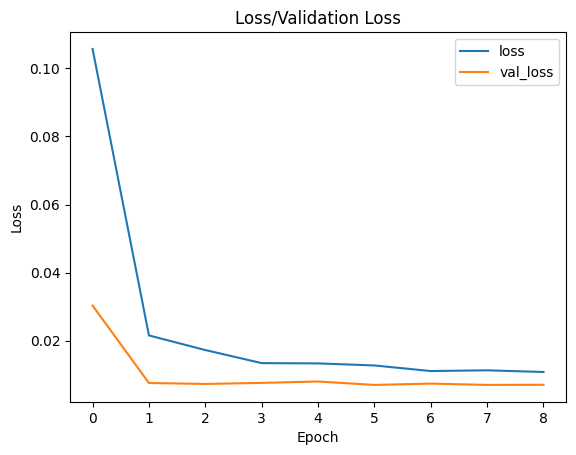

plotting MSE


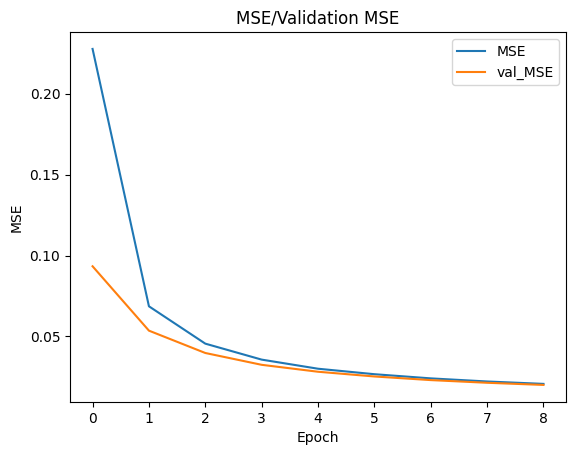

display the content of the model
13/13 - 0s - loss: 0.0070 - MSE: 0.0196
loss :  0.007045970764011145
MSE :  0.019634153693914413

plotting prediction results
plotting predictions


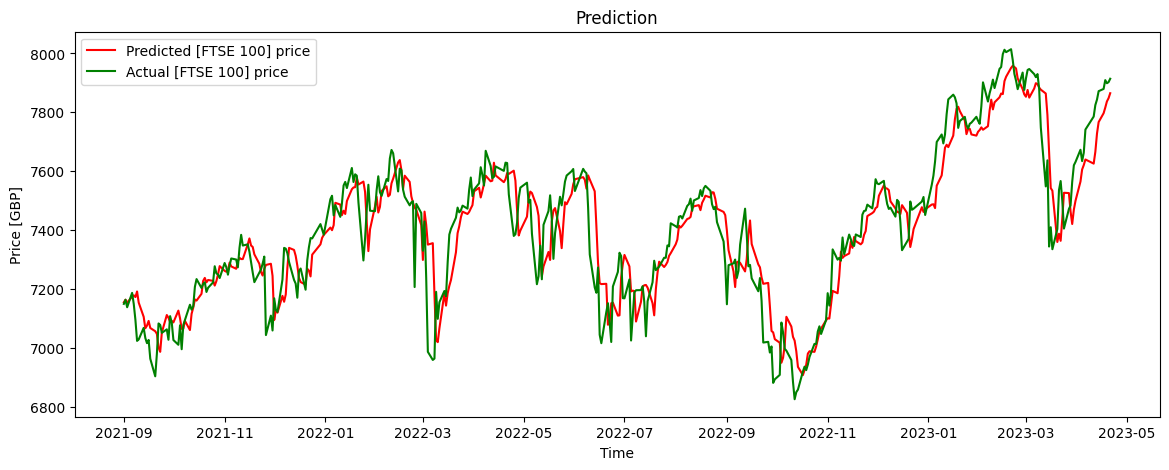

prediction is finished


In [2]:
STOCK_TICKER = "^FTSE"
STOCK_START_DATE = pd.to_datetime("2017-11-01")
STOCK_VALIDATION_DATE = pd.to_datetime("2021-09-01")
EPOCHS = 100
BATCH_SIZE = 10
TIME_STEPS = 3
TODAY_RUN = datetime.today().strftime("%Y%m%d")
TOKEN = STOCK_TICKER + '_' + TODAY_RUN + '_' + secrets.token_hex(16)
GITHUB_URL = "https://github.com/JordiCorbilla/stock-prediction-deep-neural-learning/raw/master/"
print('Ticker: ' + STOCK_TICKER)
print('Start Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Validation Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Test Run Folder: ' + TOKEN)
# create project run folder
PROJECT_FOLDER = os.path.join(os.getcwd(), TOKEN)
if not os.path.exists(PROJECT_FOLDER):
    os.makedirs(PROJECT_FOLDER)

stock_prediction = StockPrediction(STOCK_TICKER, 
                                   STOCK_START_DATE, 
                                   STOCK_VALIDATION_DATE, 
                                   PROJECT_FOLDER, 
                                   GITHUB_URL,
                                   EPOCHS,
                                   TIME_STEPS,
                                   TOKEN,
                                   BATCH_SIZE)
# Execute Deep Learning model
train_LSTM_network(stock_prediction)

### Our Methodology

#### Google Stock Price Prediction

30/30 [==============================] - 3s 26ms/step


C:\Users\Sanjay V Kurian\AppData\Local\Temp\ipykernel_26268\3520258648.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


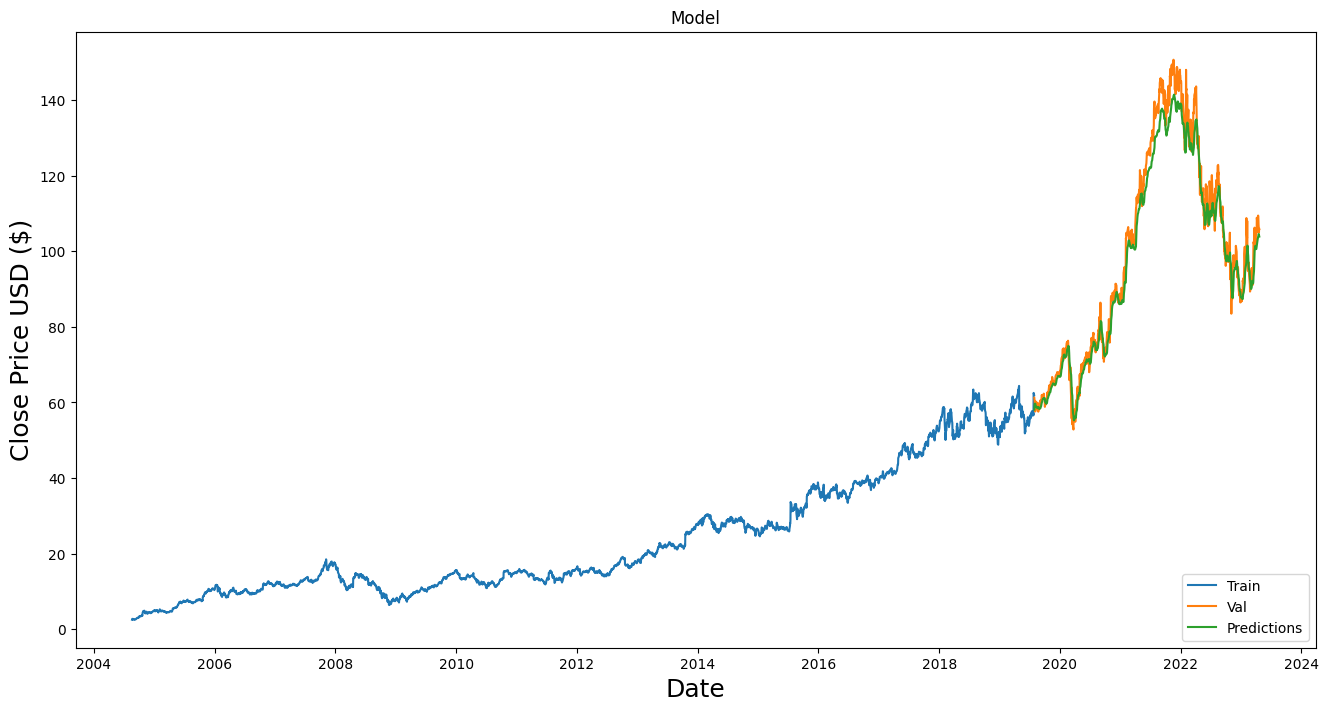

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Download market data
stock = yf.Ticker("GOOG")
df = stock.history(period="max")

# Create training and testing datasets
data = df.filter(['Close']).values
training_data_len = int(np.ceil(0.8 * len(data)))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define and train LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Generate predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot predictions and actual data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


#### Apple Stock Price Prediction

In [4]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-04-21')

# Print the first 5 rows of the dataframe
print(tickerDf.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.487649  6.520174  6.455732  6.505280  493729600   
2010-01-05 00:00:00-05:00  6.523216  6.553309  6.482180  6.516529  601904800   
2010-01-06 00:00:00-05:00  6.516527  6.542365  6.406186  6.412873  552160000   
2010-01-07 00:00:00-05:00  6.436583  6.444182  6.354510  6.401018  477131200   
2010-01-08 00:00:00-05:00  6.392507  6.444182  6.354815  6.443574  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [5]:
import yfinance as yf
import pandas as pd

# Download historical data for Apple from Yahoo Finance
apple = yf.Ticker("AAPL")
df = apple.history(period="max")

# Resample data to monthly frequency
df_monthly = df.resample("M").mean()

# Create new columns for returns and log returns
df_monthly["Returns"] = df_monthly["Close"].pct_change()
df_monthly["Log Returns"] = np.log(1 + df_monthly["Returns"])

# Drop missing values
df_monthly.dropna(inplace=True)

# Print first 5 rows of the data
print(df_monthly.head())

                               Open      High       Low     Close  \
Date                                                                
1981-01-31 00:00:00-05:00  0.110148  0.110396  0.109797  0.109797   
1981-02-28 00:00:00-05:00  0.091849  0.092168  0.091598  0.091598   
1981-03-31 00:00:00-05:00  0.086498  0.086774  0.086143  0.086143   
1981-04-30 00:00:00-04:00  0.094643  0.094932  0.094436  0.094436   
1981-05-31 00:00:00-04:00  0.100762  0.101239  0.100567  0.100567   

                                 Volume  Dividends  Stock Splits   Returns  \
Date                                                                         
1981-01-31 00:00:00-05:00  2.899947e+07        0.0           0.0  0.039829   
1981-02-28 00:00:00-05:00  1.692733e+07        0.0           0.0 -0.165753   
1981-03-31 00:00:00-05:00  3.185076e+07        0.0           0.0 -0.059554   
1981-04-30 00:00:00-04:00  2.556800e+07        0.0           0.0  0.096274   
1981-05-31 00:00:00-04:00  2.952096e+07        0

[*********************100%***********************]  1 of 1 completed


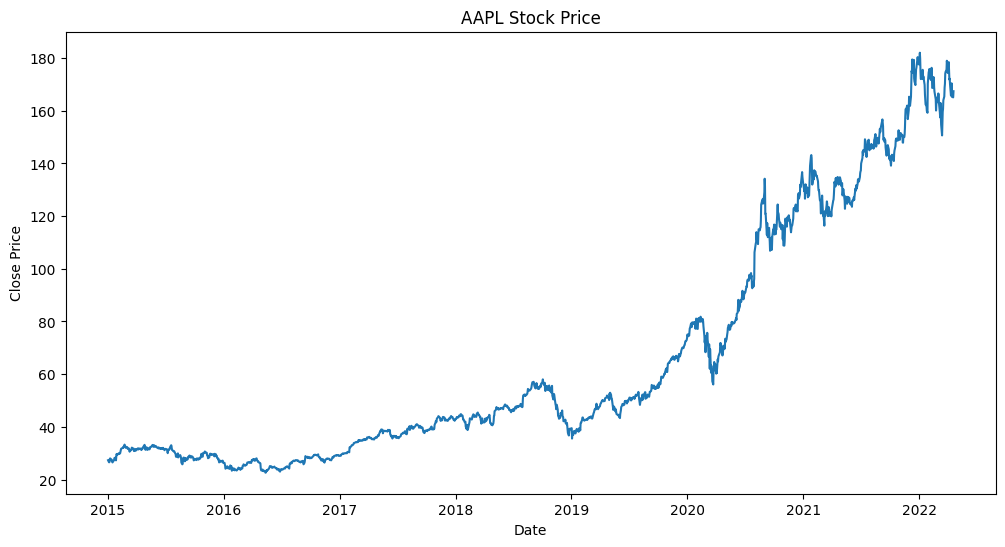

Epoch 1/10
45/45 [==============================] - 18s 97ms/step - loss: 0.0044
Epoch 2/10
45/45 [==============================] - 4s 95ms/step - loss: 0.0016
Epoch 3/10
45/45 [==============================] - 4s 95ms/step - loss: 8.8947e-04
Epoch 4/10
45/45 [==============================] - 4s 91ms/step - loss: 7.9461e-04
Epoch 5/10
45/45 [==============================] - 4s 92ms/step - loss: 8.3471e-04
Epoch 6/10
45/45 [==============================] - 4s 91ms/step - loss: 7.5503e-04
Epoch 7/10
45/45 [==============================] - 4s 93ms/step - loss: 6.2356e-04
Epoch 8/10
45/45 [==============================] - 4s 97ms/step - loss: 6.2943e-04
Epoch 9/10
45/45 [==============================] - 5s 102ms/step - loss: 6.5087e-04
Epoch 10/10
12/12 [==============================] - 2s 35ms/step


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Download stock data for Apple Inc. from Yahoo Finance
stock_ticker = "AAPL"
df = yf.download(stock_ticker, start="2015-01-01", end="2022-04-20")

# Plot the closing stock price for the downloaded data
plt.figure(figsize=(12,6))
plt.title(f"{stock_ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(df['Close'])
plt.show()

# Extract the closing stock prices
closing_prices = df.filter(['Close']).values

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_closing_prices = scaler.fit_transform(closing_prices)

# Define the training data set
training_data_size = int(len(scaled_closing_prices) * 0.8)
training_data = scaled_closing_prices[0:training_data_size, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
time_steps = 60
for i in range(time_steps, len(training_data)):
    x_train.append(training_data[i-time_steps:i, 0])
    y_train.append(training_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the training data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Define the testing data set
test_data = scaled_closing_prices[training_data_size - time_steps:, :]

# Split the data into x_test and y_test data sets
x_test = []
y_test = closing_prices[training_data_size:, :]
for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0])

x_test = np.array(x_test)

# Reshape the testing data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#### Predicting price of Google stocks using different models

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Download market data
stock_ticker = "GOOG"
stock = yf.Ticker(stock_ticker)
df = yf.download(stock_ticker, start="2015-01-01", end="2022-04-20")

# Prepare data for modeling
X = df.drop(columns=['Close'])
y = df['Close'].values.reshape(-1, 1)

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Define and train an LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
          epochs=100, batch_size=32, verbose=2, 
          validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), 
          callbacks=[early_stopping])

# Generate predictions and evaluate performance
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('R2 score: ', r2)

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
46/46 - 13s - loss: 0.0486 - val_loss: 0.0124 - 13s/epoch - 273ms/step
Epoch 2/100
46/46 - 1s - loss: 0.0048 - val_loss: 0.0104 - 763ms/epoch - 17ms/step
Epoch 3/100
46/46 - 1s - loss: 0.0029 - val_loss: 0.0022 - 774ms/epoch - 17ms/step
Epoch 4/100
46/46 - 1s - loss: 0.0021 - val_loss: 0.0055 - 757ms/epoch - 16ms/step
Epoch 5/100
46/46 - 1s - loss: 0.0022 - val_loss: 0.0270 - 816ms/epoch - 18ms/step
Epoch 6/100
46/46 - 1s - loss: 0.0020 - val_loss: 0.0355 - 753ms/epoch - 16ms/step
Epoch 7/100
46/46 - 1s - loss: 0.0020 - val_loss: 0.0795 - 782ms/epoch - 17ms/step
Epoch 8/100
46/46 - 1s - loss: 0.0019 - val_loss: 0.0629 - 752ms/epoch - 16ms/step
Epoch 9/100
46/46 - 1s - loss: 0.0018 - val_loss: 0.0572 - 850ms/epoch - 18ms/step
Epoch 10/100
46/46 - 1s - loss: 0.0016 - val_loss: 0.0599 - 936ms/epoch - 20ms/step
Epoch 11/100
46/46 - 1s - loss: 0.0016 - val_loss: 0.0496 - 837ms/epoch - 18ms/step
Epoch 12/100
46/

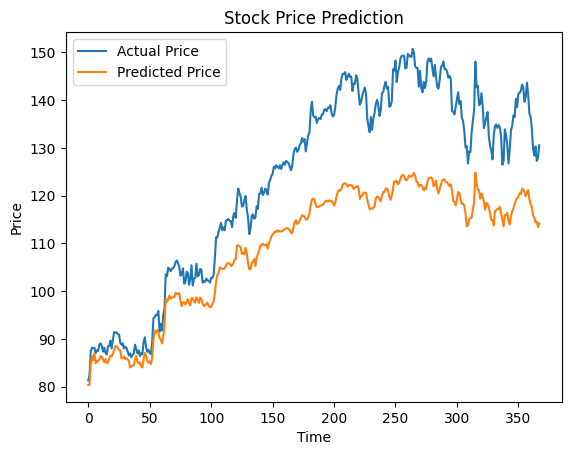

In [8]:
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Download market data
stock_ticker = "GOOG"
stock = yf.Ticker(stock_ticker)
df = yf.download(stock_ticker, start="2015-01-01", end="2022-04-20")

# Prepare data for modeling
X = df.drop(columns=['Close'])
y = df['Close'].values.reshape(-1, 1)

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Define and train an LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
          epochs=200, batch_size=64, verbose=2, 
          validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), 
          callbacks=[early_stopping])

# Generate predictions and evaluate performance
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('R2 score: ', r2)

[*********************100%***********************]  1 of 1 completed
Epoch 1/200
23/23 - 15s - loss: 0.0527 - val_loss: 0.2946 - 15s/epoch - 634ms/step
Epoch 2/200
23/23 - 1s - loss: 0.0054 - val_loss: 0.0234 - 604ms/epoch - 26ms/step
Epoch 3/200
23/23 - 1s - loss: 0.0041 - val_loss: 0.0765 - 569ms/epoch - 25ms/step
Epoch 4/200
23/23 - 1s - loss: 0.0034 - val_loss: 0.0503 - 535ms/epoch - 23ms/step
Epoch 5/200
23/23 - 0s - loss: 0.0036 - val_loss: 0.0670 - 467ms/epoch - 20ms/step
Epoch 6/200
23/23 - 0s - loss: 0.0036 - val_loss: 0.0366 - 460ms/epoch - 20ms/step
Epoch 7/200
23/23 - 1s - loss: 0.0030 - val_loss: 0.0644 - 513ms/epoch - 22ms/step
Epoch 8/200
23/23 - 0s - loss: 0.0026 - val_loss: 0.0199 - 475ms/epoch - 21ms/step
Epoch 9/200
23/23 - 1s - loss: 0.0029 - val_loss: 0.0405 - 504ms/epoch - 22ms/step
Epoch 10/200
23/23 - 1s - loss: 0.0030 - val_loss: 0.0318 - 537ms/epoch - 23ms/step
Epoch 11/200
23/23 - 0s - loss: 0.0027 - val_loss: 0.0535 - 478ms/epoch - 21ms/step
Epoch 12/200
23/

#### Using Random Forest to predict

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Download market data
stock_ticker = "GOOG"
stock = yf.Ticker(stock_ticker)
df = yf.download(stock_ticker, start="2015-01-01", end="2022-04-20")

# Prepare data for modeling
X = df.drop(columns=['Close'])
y = df['Close']

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define and train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate predictions and evaluate performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('R2 score: ', r2)

[*********************100%***********************]  1 of 1 completed
MSE:  1868.6904217023216
R2 score:  -3.53949013285117


In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Download market data
stock_ticker = "GOOG"
stock = yf.Ticker(stock_ticker)
df = yf.download(stock_ticker, start="2015-01-01", end="2022-04-20")

# Prepare data for modeling
X = df.drop(columns=['Close'])
y = df['Close']

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define and train a random forest model with GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Train a model with best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Generate predictions and evaluate performance
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Parameters:', best_params)
print('MSE: ', mse)
print('R2 score: ', r2)


[*********************100%***********************]  1 of 1 completed


c:\Users\Sanjay V Kurian\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Sanjay V Kurian\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MSE:  1978.362440937256
R2 score:  -3.805909355310349


By looking at the MSE score, it is evident that Random Forest is not performing well. Deep neural networks has produced way better result this RF.

And, the results obtained by the experts using neural network and LSTM is better than ours.